In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
data =  pd.read_csv('Lable_Dataset.csv')
data

,Position,Reference_Codon,Query_Codon,Mutation_Type
0,5,AAA,AAC,Missense Substitution
1,44,TCG,TCA,Silent Substitution
2,81,ATC,TTC,Missense Substitution
3,99,CGG,GGG,Missense Substitution
4,186,AGG,CGG,Silent Substitution
...,...,...,...,...
1064,30153,TGC,AGC,Missense Substitution
1065,30165,GTG,TTG,Missense Substitution
1066,30181,TCT,TAT,Missense Substitution
1067,30185,TAG,TAA,Silent Substitution


In [30]:
print(data.columns)

Index(['Position', 'Reference_Codon', 'Query_Codon', 'Mutation_Type'], dtype='object')


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Position         1069 non-null   int64
 1   Reference_Codon  1069 non-null   int32
 2   Query_Codon      1069 non-null   int32
 3   Mutation_Type    1069 non-null   int32
dtypes: int32(3), int64(1)
memory usage: 21.0 KB
None


In [32]:
print(data.isna().sum())

Position           0
Reference_Codon    0
Query_Codon        0
Mutation_Type      0
dtype: int64


In [33]:
print(data.describe())

           Position  Reference_Codon  Query_Codon  Mutation_Type
count   1069.000000      1069.000000  1069.000000    1069.000000
mean   15135.072965        38.443405    32.925164       3.742750
std     8598.619854        24.363274    19.743724       1.755744
min        5.000000         0.000000     0.000000       0.000000
25%     7827.000000        16.000000    15.000000       3.000000
50%    15296.000000        40.000000    34.000000       3.000000
75%    22219.000000        60.000000    50.000000       4.000000
max    30204.000000        75.000000    64.000000       7.000000


In [3]:
X = data[['Reference_Codon', 'Query_Codon', 'Position']]
y = data['Mutation_Type']

In [4]:
lab = LabelEncoder()
for column in data.select_dtypes(include='object').columns.values:
    data[column] = lab.fit_transform(data[column])
print(data)

      Position  Reference_Codon  Query_Codon  Mutation_Type
0            5                7            2              3
1           44               65           53              7
2           81               21           62              3
3           99               33           43              3
4          186               17           27              7
...        ...              ...          ...            ...
1064     30153               68           10              3
1065     30165               55           63              3
1066     30181               66           52              3
1067     30185               60           49              7
1068     30204                7           17              3

[1069 rows x 4 columns]


In [16]:
#Scaling the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

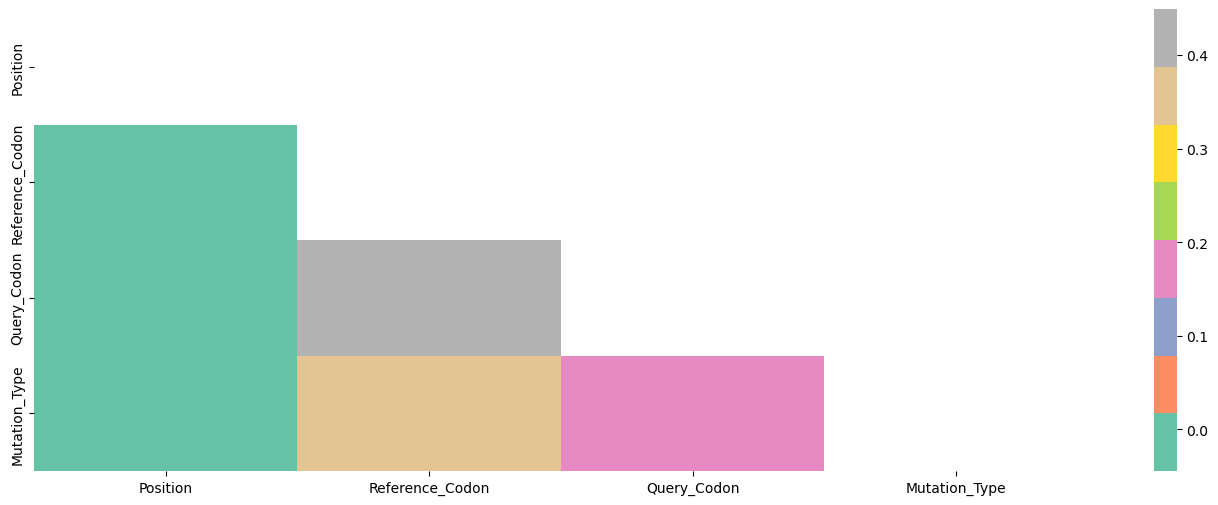

In [34]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

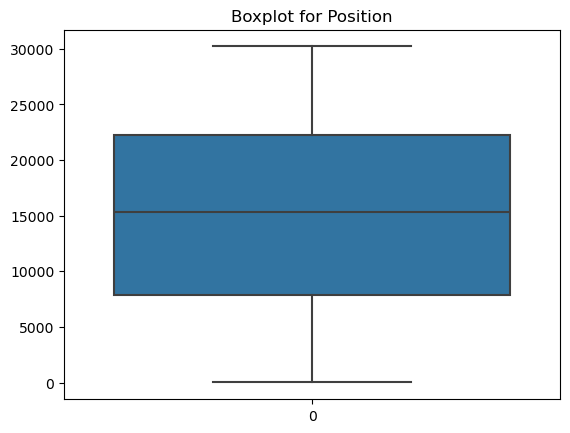

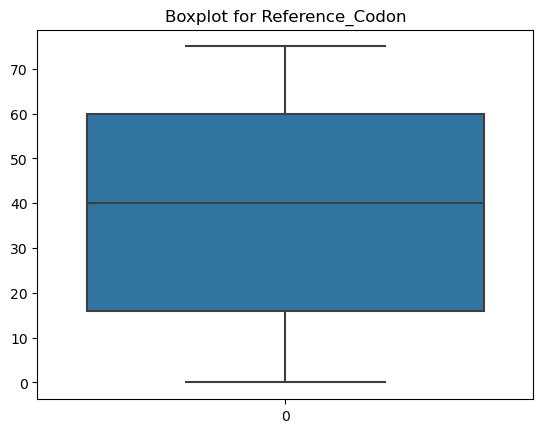

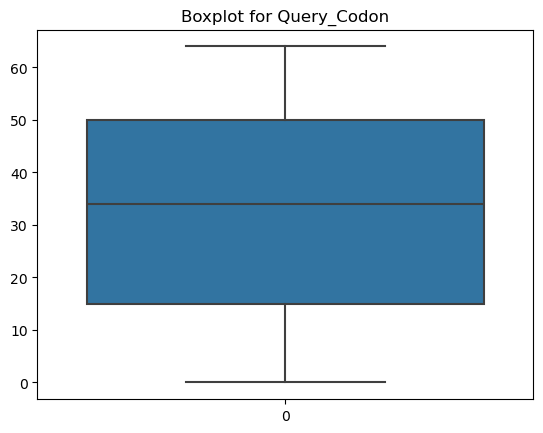

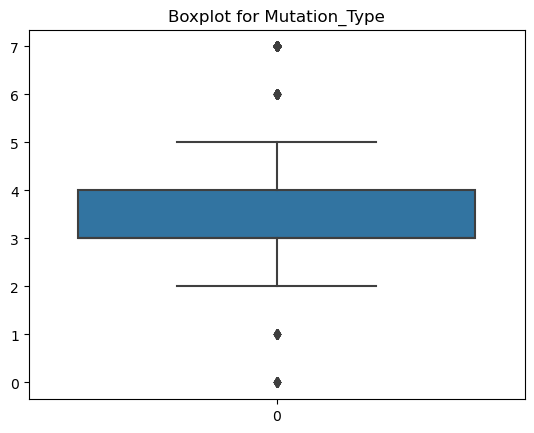

In [6]:
numeric_columns = data.select_dtypes(include=['number']).columns 
for col in numeric_columns:
    sn.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [47]:
# Models

Logistic Regression Accuracy: 0.75
     True Mutation  Predicted Mutation
708              3                   3
215              7                   3
882              3                   3
88               4                   3
842              3                   3
Confusion Matrix for Logistic Regression:
 [[  2   0   0   0   0   0   0]
 [  0   0   0   2   0   0   1]
 [  0   0  29   0   0   0   0]
 [  0   0   0 147   0   0  11]
 [  0   0   0  13   0   0   0]
 [  0   0   0   0   0  20   0]
 [  0   0   0  38   0   1   4]]


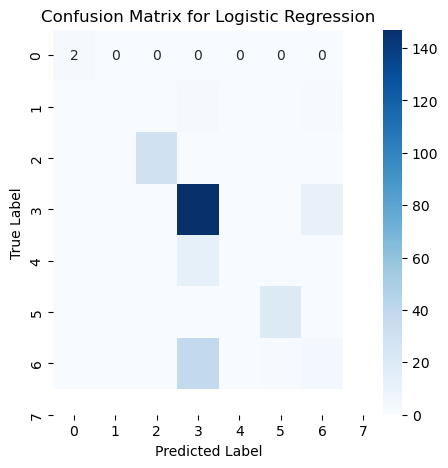


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.00      0.00         3
           2       1.00      1.00      1.00        29
           3       0.73      0.93      0.82       158
           4       1.00      0.00      0.00        13
           6       0.95      1.00      0.98        20
           7       0.25      0.09      0.14        43

    accuracy                           0.75       268
   macro avg       0.85      0.57      0.56       268
weighted avg       0.72      0.75      0.69       268



In [17]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import matplotlib.pyplot as plt


X = data[['Reference_Codon', 'Position']]
y = data['Mutation_Type']

X = pd.get_dummies(X, columns=['Reference_Codon'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)


lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

results = pd.DataFrame({
    'True Mutation': y_test,
    'Predicted Mutation': y_pred_lr
})
print(results.head())

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix)

plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=1))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 10
[LightGBM] [Info] Start training from score -3.977811
[LightGBM] [Info] Start training from score -4.200954
[LightGBM] [Info] Start training from score -2.437366
[LightGBM] [Info] Start training from score -0.501712
[LightGBM] [Info] Start training from score -3.130513
[LightGBM] [Info] Start training from score -5.992714
[LightGBM] [Info] Start training from score -3.048275
[LightGBM] [Info] Start training from score -1.716048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

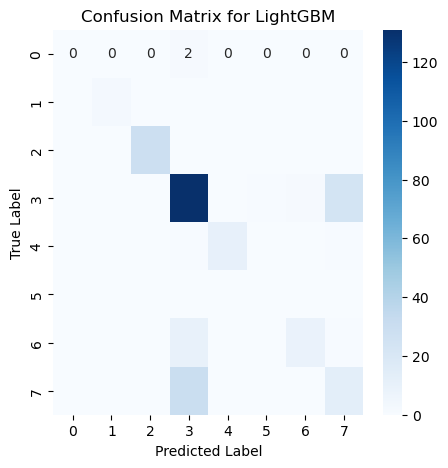


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        29
           3       0.75      0.83      0.79       158
           4       1.00      0.85      0.92        13
           5       0.00      1.00      0.00         0
           6       0.82      0.45      0.58        20
           7       0.33      0.30      0.32        43

    accuracy                           0.73       268
   macro avg       0.74      0.68      0.58       268
weighted avg       0.73      0.73      0.72       268



In [18]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

X = data[['Reference_Codon', 'Query_Codon', 'Position']]
y = data['Mutation_Type']

X = pd.get_dummies(X, columns=['Reference_Codon'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)


y_pred_lgbm = lgbm.predict(X_test)


lgbm_accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {lgbm_accuracy:.2f}")

results = pd.DataFrame({
    'True Mutation': y_test,
    'Predicted Mutation': y_pred_lgbm
})
print(results.head())

conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix for LightGBM:\n", conf_matrix)

plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LightGBM')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm, zero_division=1))


Decision Tree Accuracy: 0.77
     True Mutation  Predicted Mutation
708              3                   3
215              7                   3
882              3                   3
88               4                   3
842              3                   3
Confusion Matrix for Decision Tree:
 [[  0   0   0   2   0   0   0]
 [  0   0   0   3   0   0   0]
 [  0   0  29   0   0   0   0]
 [  0   0   0 157   0   0   1]
 [  0   0   0  13   0   0   0]
 [  0   0   0   0   0  19   1]
 [  0   0   0  41   0   1   1]]


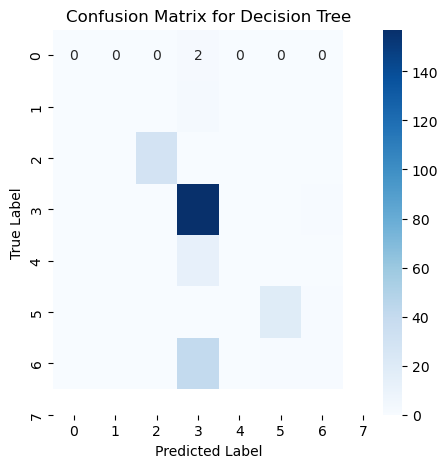


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00         3
           2       1.00      1.00      1.00        29
           3       0.73      0.99      0.84       158
           4       1.00      0.00      0.00        13
           6       0.95      0.95      0.95        20
           7       0.33      0.02      0.04        43

    accuracy                           0.77       268
   macro avg       0.86      0.42      0.40       268
weighted avg       0.73      0.77      0.68       268



In [19]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

X = data[['Reference_Codon', 'Position']]
y = data['Mutation_Type']

X = pd.get_dummies(X, columns=['Reference_Codon'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

results = pd.DataFrame({
    'True Mutation': y_test,
    'Predicted Mutation': y_pred_dt
})
print(results.head())

conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", conf_matrix)

plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=1))


Random Forest Accuracy: 0.66
     True Mutation  Predicted Mutation
708              3                   3
215              7                   7
882              3                   3
88               4                   3
842              3                   3
Confusion Matrix for Random Forest:
 [[  1   0   0   1   0   0   0]
 [  0   0   0   1   1   0   1]
 [  0   0  29   0   0   0   0]
 [  0   2   0 118  12   0  26]
 [  0   0   0   7   4   0   2]
 [  0   0   0   0   0  17   3]
 [  0   0   0  33   0   1   9]]


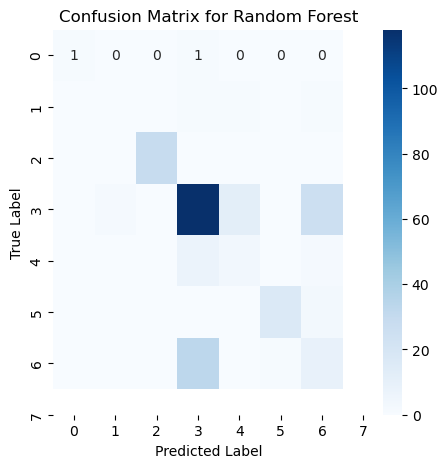


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         3
           2       1.00      1.00      1.00        29
           3       0.74      0.75      0.74       158
           4       0.24      0.31      0.27        13
           6       0.94      0.85      0.89        20
           7       0.22      0.21      0.21        43

    accuracy                           0.66       268
   macro avg       0.59      0.52      0.54       268
weighted avg       0.67      0.66      0.66       268



In [20]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt


X = data[['Reference_Codon', 'Position']]
y = data['Mutation_Type']

X = pd.get_dummies(X, columns=['Reference_Codon'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

results = pd.DataFrame({
    'True Mutation': y_test,
    'Predicted Mutation': y_pred_rf
})
print(results.head())

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix)


plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))


Random Forest Accuracy: 0.82
Confusion Matrix for Random Forest:
 [[  1   0   0   1   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  26   0   0   0   0]
 [  0   0   0 122   0   0   4]
 [  0   0   0   0  10   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0  33   1   0   3]]
   True Mutation  Predicted Mutation
0              3                   3
1              7                   3
2              3                   3
3              4                   4
4              3                   3


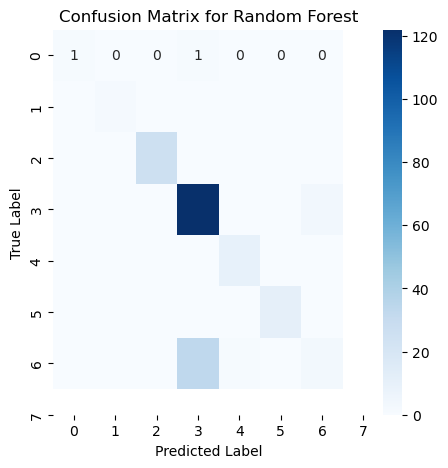


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        26
           3       0.78      0.97      0.87       126
           4       0.91      1.00      0.95        10
           6       1.00      1.00      1.00        11
           7       0.43      0.08      0.14        37

    accuracy                           0.82       214
   macro avg       0.87      0.79      0.80       214
weighted avg       0.77      0.82      0.77       214



In [21]:
# Random Forest Classifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

X = data[['Reference_Codon', 'Query_Codon', 'Position']]
y = data['Mutation_Type']

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix)

results = pd.DataFrame({
    'True Mutation': y_test.reset_index(drop=True),
    'Predicted Mutation': y_pred_rf
})
print(results.head())

plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))


AdaBoost Accuracy: 0.84
     True Mutation  Predicted Mutation
708              3                   3
215              7                   3
882              3                   3
88               4                   4
842              3                   3
Confusion Matrix for AdaBoost:
 [[  2   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0]
 [  0   0  29   0   0   0   0]
 [  0   0   0 158   0   0   0]
 [  0   0   0   0  10   0   3]
 [  0   0   0   0   0  19   1]
 [  0   0   0  39   0   0   4]]


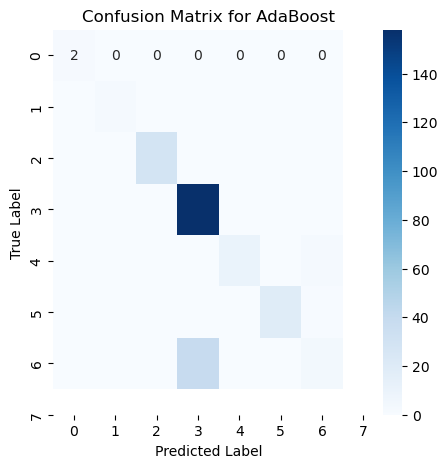


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        29
           3       0.80      1.00      0.89       158
           4       1.00      0.77      0.87        13
           6       1.00      0.95      0.97        20
           7       0.50      0.09      0.16        43

    accuracy                           0.84       268
   macro avg       0.90      0.83      0.84       268
weighted avg       0.80      0.84      0.79       268



In [22]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

X = data[['Reference_Codon','Query_Codon', 'Position']]
y = data['Mutation_Type']

X = pd.get_dummies(X, columns=['Reference_Codon', 'Query_Codon'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

base_model = DecisionTreeClassifier(max_depth=3)
adb = AdaBoostClassifier(estimator=base_model, n_estimators=200, learning_rate=0.05, random_state=42)
adb.fit(X_train, y_train)

predictions = adb.predict(X_test)

adb_accuracy = adb.score(X_test, y_test)
print(f"AdaBoost Accuracy: {adb_accuracy:.2f}")

results = pd.DataFrame({
    'True Mutation': y_test,
    'Predicted Mutation': predictions
})
print(results.head())



conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix for AdaBoost:\n", conf_matrix)




plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division=1))


Gradient Boosting Accuracy: 0.82
     True Mutation  Predicted Mutation
708              3                   3
215              7                   3
882              3                   3
88               4                   4
842              3                   3
Confusion Matrix for Gradient Boosting:
 [[  2   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0]
 [  0   0  29   0   0   0   0]
 [  0   0   0 150   0   0   8]
 [  0   0   0   3  10   0   0]
 [  0   0   0   2   0  15   3]
 [  0   0   0  32   0   0  11]]


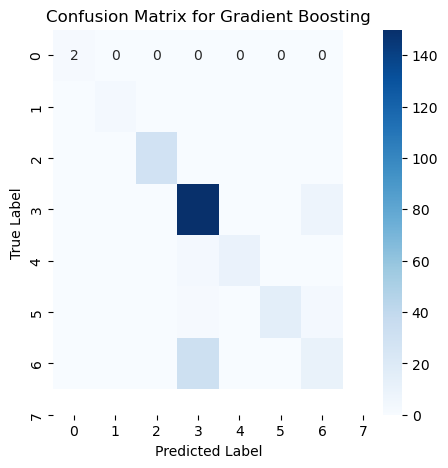


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        29
           3       0.80      0.95      0.87       158
           4       1.00      0.77      0.87        13
           6       1.00      0.75      0.86        20
           7       0.50      0.26      0.34        43

    accuracy                           0.82       268
   macro avg       0.90      0.82      0.85       268
weighted avg       0.80      0.82      0.80       268



In [23]:
# Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

X = data[['Reference_Codon', 'Query_Codon', 'Position']]
y = data['Mutation_Type']

X = pd.get_dummies(X, columns=['Reference_Codon'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

results = pd.DataFrame({
    'True Mutation': y_test,
    'Predicted Mutation': y_pred_gb
})
print(results.head())

conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix for Gradient Boosting:\n", conf_matrix)



plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))


Index(['Position', 'Reference_Codon', 'Query_Codon', 'Mutation_Type'], dtype='object')
SVM Classifier Accuracy: 0.84
Confusion Matrix:
 [[  2   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0]
 [  0   0  26   0   0   0   0]
 [  0   0   0 111   0   0  15]
 [  0   0   0   0  10   0   0]
 [  0   0   0   0   0  11   0]
 [  0   0   0  19   0   0  18]]
     True Mutation  Predicted Mutation
708              3                   3
215              7                   7
882              3                   3
88               4                   4
842              3                   3


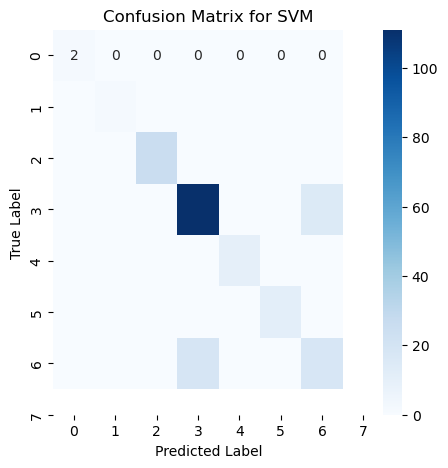


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        26
           3       0.85      0.88      0.87       126
           4       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        11
           7       0.55      0.49      0.51        37

    accuracy                           0.84       214
   macro avg       0.91      0.91      0.91       214
weighted avg       0.84      0.84      0.84       214



In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sn
import matplotlib.pyplot as plt

print(data.columns)

x = data[['Reference_Codon', 'Query_Codon']]
y = data['Mutation_Type']

encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x).toarray()
x = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm = SVC(kernel='linear')  
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

results = pd.DataFrame({
    'True Mutation': y_test,  
    'Predicted Mutation': y_pred  
})
print(results.head())

plt.figure(figsize=(5, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


C:\Users\Lapy Store\AppData\Local\Temp\ipykernel_27596\2924674061.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Reference_Codon'] = encoder.fit_transform(X['Reference_Codon'])
C:\Users\Lapy Store\AppData\Local\Temp\ipykernel_27596\2924674061.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Query_Codon'] = encoder.fit_transform(X['Query_Codon'])
C:\Users\Lapy Store\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`inp

Epoch 1/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5449 - loss: 1.6628 - val_accuracy: 0.6903 - val_loss: 1.1601
Epoch 2/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7086 - loss: 1.1296 - val_accuracy: 0.7015 - val_loss: 1.0258
Epoch 3/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7129 - loss: 0.9985 - val_accuracy: 0.6940 - val_loss: 1.0190
Epoch 4/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7015 - loss: 1.0103 - val_accuracy: 0.6716 - val_loss: 0.9700
Epoch 5/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7048 - loss: 0.9850 - val_accuracy: 0.6754 - val_loss: 0.9150
Epoch 6/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7001 - loss: 0.9207 - val_accuracy: 0.7015 - val_loss: 0.9236
Epoch 7/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6864 - loss: 0.9340 - val_accuracy: 0.7052 - val_loss: 0.8705
Epoch 8/450
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7112 - loss: 0.8634 - val_accuracy: 0.69

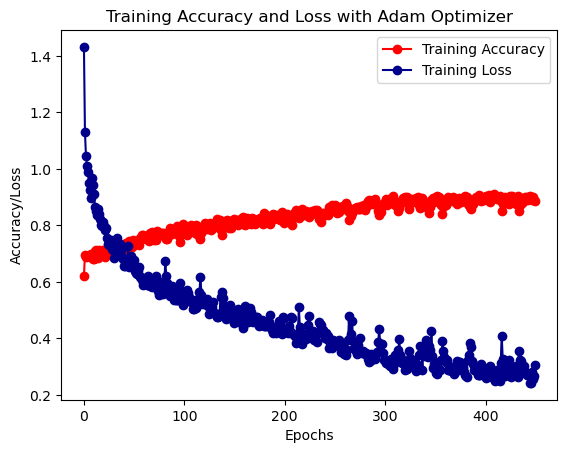

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras.activations
import keras.losses
import keras.optimizers
from sklearn.preprocessing import LabelEncoder

X = data[['Reference_Codon', 'Query_Codon']]
Y = pd.get_dummies(data['Mutation_Type']) 

encoder = LabelEncoder()
X['Reference_Codon'] = encoder.fit_transform(X['Reference_Codon'])
X['Query_Codon'] = encoder.fit_transform(X['Query_Codon'])

x_tran, x_tst, y_tran, y_tst = train_test_split(X, Y, test_size=0.25, random_state=42)

model = Sequential()

model.add(Dense(units=64, input_dim=x_tst.shape[1], activation=keras.activations.relu))
model.add(Dense(units=128, activation=keras.activations.relu))
model.add(Dense(units=256, activation=keras.activations.relu))
model.add(Dense(units=128, activation=keras.activations.relu))
model.add(Dense(units=64, activation=keras.activations.relu))

model.add(Dense(units=Y.shape[1], activation=keras.activations.softmax))

model.compile(optimizer='adam', metrics=['accuracy'], loss=keras.losses.categorical_crossentropy)

history = model.fit(x_tran, y_tran, batch_size=45, epochs=450, validation_data=(x_tst, y_tst))

model.save('adam_model.keras')

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', color='red')
plt.plot(history.history['loss'], label='Training Loss', marker='o', color='darkblue')
plt.title('Training Accuracy and Loss with Adam Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()


In [25]:
import tkinter as tk
from tkinter import messagebox

In [26]:
from joblib import dump
dump(svm, 'svm_model.joblib')
dump(scaler, 'scaler.joblib')
from joblib import load
svm_model = load('svm_model.joblib')
scaler = load('scaler.joblib')

In [27]:
def analyze_codon_sequence(dna_sequence, mutation_data):
    dna_sequence = dna_sequence.upper()  
    mutations_detected = []

    
    codons = [dna_sequence[i:i+3] for i in range(0, len(dna_sequence), 3)]

    
    for _, row in mutation_data.iterrows():
        position = row['Position'] - 1  
        reference_codon = row['Reference_Codon'].upper()
        query_codon = row['Query_Codon'].upper()
        mutation_type = row['Mutation_Type']

        
        if position >= len(codons):
            continue

        observed_codon = codons[position]

        
        if observed_codon == query_codon :
            mutation = mutation_type
            mutations_detected.append((position + 1, reference_codon, query_codon, observed_codon, mutation))

    return mutations_detected



In [28]:
def check_sequence():
    dna_sequence = entry.get()
    if not dna_sequence:
        messagebox.showwarning("Input Error", "Please enter a DNA sequence.")
        return
    dataset = pd.read_csv('Lable_Dataset.csv')
    mutations = analyze_codon_sequence(dna_sequence, dataset)

    if mutations:
        result = "Results of Analysis:\n"
        for mutation in mutations:
            result += (f"Position {mutation[0]}: Reference={mutation[1]}, Query={mutation[2]}, "
                       f"Observed={mutation[3]}, Status={mutation[4]}\n")
    else:
        result = "No Mutations Detected"
    
    messagebox.showinfo("Analysis Result", result)

In [29]:
root = tk.Tk()
root.title("DNA Mutation Analyzer")
root.configure(bg="#2E3B4E")


label = tk.Label(root, text="Enter DNA Sequence:", fg="#FFFFFF", bg="#2E3B4E", font=("Arial", 12, "bold"))
label.pack(pady=10)


entry = tk.Entry(root, width=50, bg="#FFFFFF", fg="#000000", font=("Arial", 12))
entry.pack(pady=10)

button = tk.Button(root, text="Check", command=check_sequence, bg="#4CAF50", fg="#FFFFFF", font=("Arial", 12, "bold"))
button.pack(pady=10)

root.mainloop()
